# Logistic Regression Model using Tensorflow with low level API.

# 0 - IMPORTS

In [41]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 

%matplotlib inline
warnings.filterwarnings('ignore')

# 1 - DATA LOAD

In [2]:
df1 = pd.read_csv('data\census.csv')
df_shape = df1.shape 
print('Rows: {}\nCols: {}'.format(df_shape[0], df_shape[1]))
df1.head()

Rows: 32561
Cols: 15


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2 - DATA TRANSFORMATION

In [10]:
df2 = df1.copy()

In [11]:
# change target variable content to 0 or 1
df2['income'] = df2['income'].apply( lambda x: 1 if x==' >50K' else 0)
df2['income'].unique()

array([0, 1], dtype=int64)

# 3 - CREATE TRAIN & TEST DATASET

In [12]:
X = df2.drop('income',axis=1)
y = df2.income

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 5 - LOGISTIC REGRESSION MODEL

## 5.1 - Create Features

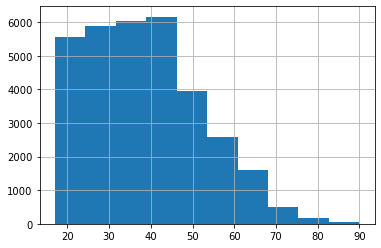

In [14]:
df2.age.hist();

In [21]:
# create tensorflow columns
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
num_columns = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

age         = tf.feature_column.numeric_column('age')
cat_age     = [ tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80,90]  ) ]
cat_columns = [ tf.feature_column.categorical_column_with_vocabulary_list( key=c, vocabulary_list=X[c].unique() ) for c in cat_columns ] 
num_columns = [ tf.feature_column.numeric_column( key=c ) for c in num_columns ] 

In [24]:
model_columns = cat_age + cat_columns + num_columns

## 5.2 - Create Classifier

In [ ]:
lr_model = tf.estimator.LinearClassifier(feature_columns=model_columns)

## 5.3 - Create Train and Test Function 

In [29]:
function_train = tf.estimator.inputs.pandas_input_fn( x=X_train, y=y_train, batch_size=32, num_epochs=None, shuffle=True )

In [30]:
function_test = tf.estimator.inputs.pandas_input_fn( x=X_test, y=y_test, batch_size=32, num_epochs=1000, shuffle=False )

## 5.4 - Train Regressor

In [ ]:
lr_model.train( input_fn=function_train, steps=10000 )

## 5.5 - Train Evaluation

In [ ]:
train_metrics = lr_model.evaluate( input_fn = function_train, steps=10000 )

## 5.6 - Test Evaluation

In [ ]:
test_metrics = lr_model.evaluate( input_fn = function_test, steps=10000 )

In [40]:
train_metrics, test_metrics

({'accuracy': 0.7883375,
  'accuracy_baseline': 0.7577594,
  'auc': 0.57189685,
  'auc_precision_recall': 0.611773,
  'average_loss': 105.1801,
  'label/mean': 0.24224062,
  'loss': 3365.7632,
  'precision': 0.8681616,
  'prediction/mean': 0.04152206,
  'recall': 0.14883187,
  'global_step': 10000},
 {'accuracy': 0.7908969,
  'accuracy_baseline': 0.7624969,
  'auc': 0.5685707,
  'auc_precision_recall': 0.59728014,
  'average_loss': 102.621216,
  'label/mean': 0.23750313,
  'loss': 3283.879,
  'precision': 0.85295945,
  'prediction/mean': 0.04020242,
  'recall': 0.14448494,
  'global_step': 10000})

## 5.7 - Model Prediction

In [32]:
# Create prediction function
function_predict = tf.estimator.inputs.pandas_input_fn( x=X_test, shuffle=False )

In [33]:
y_predict = lr_model.predict( input_fn = function_predict )

In [ ]:
y_predict_values = []
for p in lr_model.predict( input_fn = function_predict ):
    y_predict_values.append(p['class_ids'])

In [44]:
acc_score = accuracy_score( y_test, y_predict_values )
acc_score

0.7908690756474562